In [1]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
dataset = pd.read_csv(r'C:\Users\Dileep\Desktop\Mini\Startups.csv')
dataset.head()# displays first 5 rows of dataset

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [4]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


In [5]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


C:\Users\Dileep\AppData\Local\Temp\ipykernel_15380\4263125570.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = dataset.corr() # corr inbuilt fn


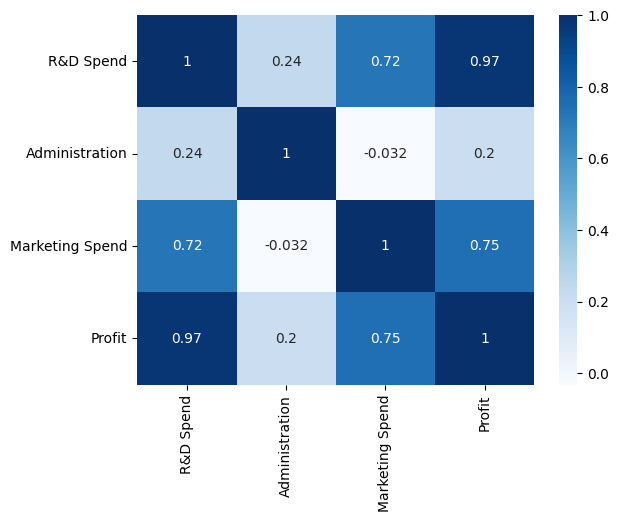

In [7]:
c = dataset.corr() # corr inbuilt fn
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

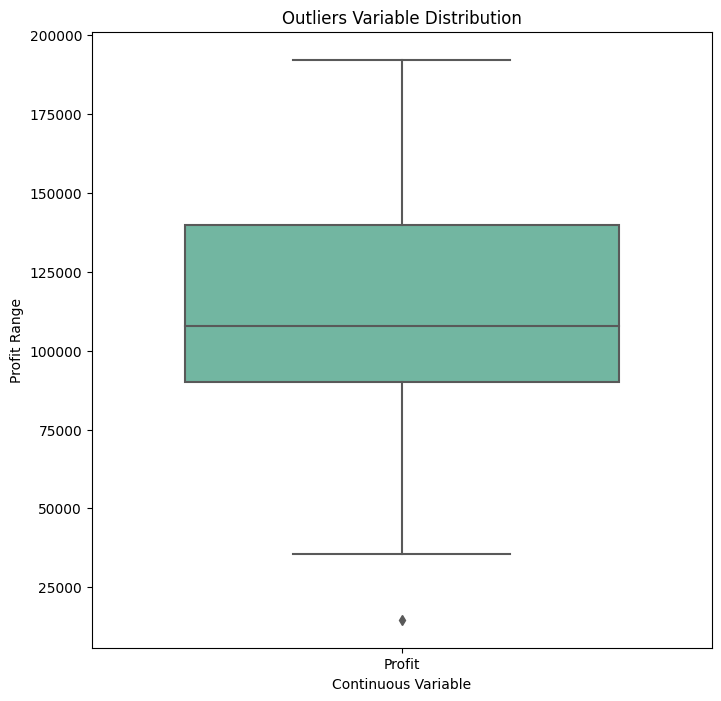

In [8]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7)
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")
 
plt.show()

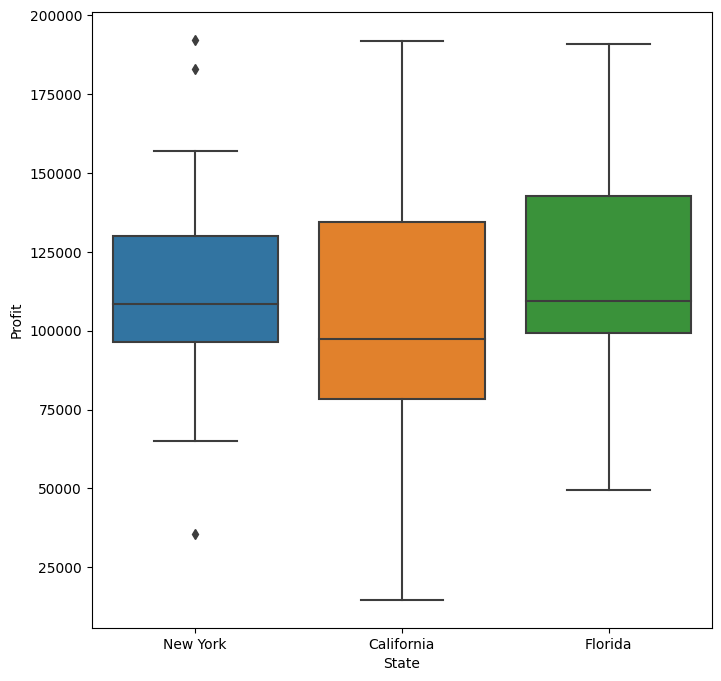

In [9]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

C:\Users\Dileep\AppData\Local\Temp\ipykernel_15380\1656791243.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Profit'],bins=5,kde=True)


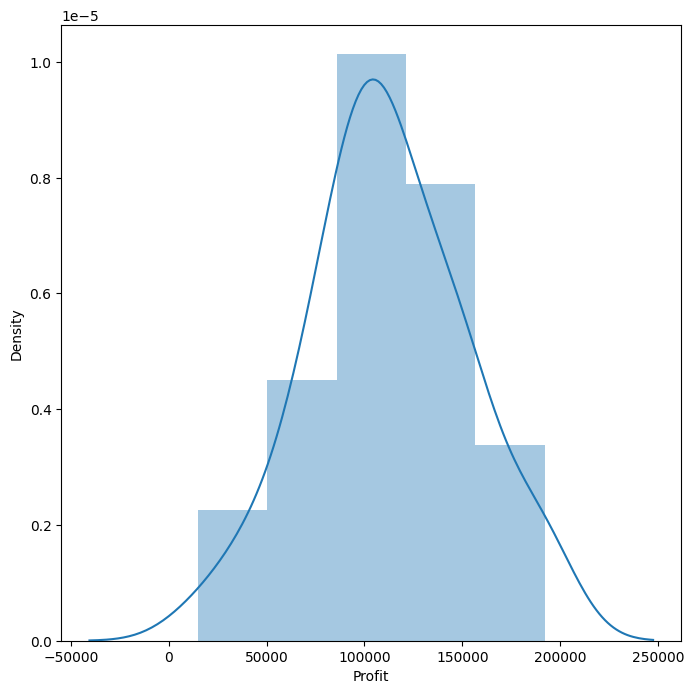

In [10]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

In [11]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, 4].values
print(X)

[[165349.2  136897.8  471784.1 ]
 [162597.7  151377.59 443898.53]
 [153441.51 101145.55 407934.54]
 [144372.41 118671.85 383199.62]
 [142107.34  91391.77 366168.42]
 [131876.9   99814.71 362861.36]
 [134615.46 147198.87 127716.82]
 [130298.13 145530.06 323876.68]
 [120542.52 148718.95 311613.29]
 [123334.88 108679.17 304981.62]
 [101913.08 110594.11 229160.95]
 [100671.96  91790.61 249744.55]
 [ 93863.75 127320.38 249839.44]
 [ 91992.39 135495.07 252664.93]
 [119943.24 156547.42 256512.92]
 [114523.61 122616.84 261776.23]
 [ 78013.11 121597.55 264346.06]
 [ 94657.16 145077.58 282574.31]
 [ 91749.16 114175.79 294919.57]
 [ 86419.7  153514.11      0.  ]
 [ 76253.86 113867.3  298664.47]
 [ 78389.47 153773.43 299737.29]
 [ 73994.56 122782.75 303319.26]
 [ 67532.53 105751.03 304768.73]
 [ 77044.01  99281.34 140574.81]
 [ 64664.71 139553.16 137962.62]
 [ 75328.87 144135.98 134050.07]
 [ 72107.6  127864.55 353183.81]
 [ 66051.52 182645.56 118148.2 ]
 [ 65605.48 153032.06 107138.38]
 [ 61994.4

In [12]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2
0,165349.20,136897.80,47.0
1,162597.70,151377.59,46.0
2,153441.51,101145.55,45.0
3,144372.41,118671.85,44.0
4,142107.34,91391.77,43.0


In [13]:
from sklearn.model_selection import train_test_split
 
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0) # performs the split

In [14]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [15]:
y_pred = model.predict(x_test)
print(y_pred)

[103365.65430448 132409.63159464 133669.58924177  71596.33493623
 179574.8809234  114195.96899299  65656.85292429  97938.81018901
 114412.29898539 169772.36831918  96050.9051499   87515.25731045
 110242.6075272   90000.89195708 127479.23515393]


In [16]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)
 
training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9324057207634493
Model Score/Performance on Training data 0.9506671824404848


In [17]:
from sklearn.metrics import r2_score
 
r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)
#multiplying by 100 insures we get a result between -100 to +100, instead of -1 to +1

R2 score of model is : 93.21346390789374


In [18]:
df = pd.DataFrame(data={"Predicted value":y_pred.flatten(),"Actual Value":y_test.flatten()})
print(df.head())

   Predicted value  Actual Value
0    103365.654304     103282.38
1    132409.631595     144259.40
2    133669.589242     146121.95
3     71596.334936      77798.83
4    179574.880923     191050.39


<AxesSubplot: title={'center': 'Actual vs Predicted'}, xlabel='Total cost', ylabel='Profit'>

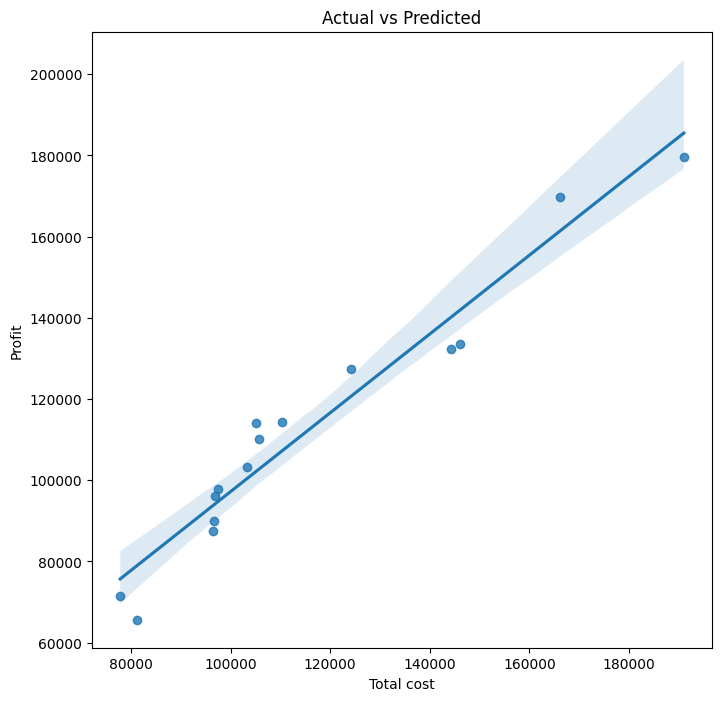

In [19]:
plt.title("Actual vs Predicted")
plt.xlabel("Total cost")
plt.ylabel("Profit")
sns.regplot(x=y_test, y=y_pred, data=df)

In [20]:
import streamlit as st

string = "Startup's Profit Prediction"
# setup page config — dynamic web page
st.set_page_config(page_title=string, page_icon="✅", layout="centered", initial_sidebar_state="auto", menu_items=None)
# st.title is a widget element
st.title (string, anchor=None)

2022-10-21 22:19:52.729 
  command:

    streamlit run C:\Users\Dileep\AppData\Roaming\Python\Python310\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [23]:
from PIL import Image 
image = Image.open("startup.jpg") #load image
st.image(image) # st.image — image widget/placeholder

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [24]:
# st.sidebar.number_input — creates a side bar at with number input field
rnd_cost = st.sidebar.number_input("Insert R&D Spend")
st.write("The current number is ", rnd_cost) # main page display
Administration_cost = st.sidebar.number_input("Insert Administration cost Spend")
st.write("The current number is ", Administration_cost)
Marketing_cost_Spend = st.sidebar.number_input("Insert Marketing cost Spend")
st.write("The current number is ", Marketing_cost_Spend)
# gives a dropdown menu at sidebar
option = st.sidebar.selectbox(
"Select the region",
("Delhi", "Banglore", "Pune"))
st.write("You selected:", option)

In [26]:
fig = plt.figure()
# defining our values
X = ["Toal cost Spend"]
x_value = [rnd_cost+Administration_cost+Marketing_cost_Spend]
# creating evenly spaced integers between 0 and length of X 
X_axis = np.arange(len(X))
# configuring plot by adding barchart data , axes ticks and labels
plt.bar(X_axis - 0.2, x_value, 0.4, label = "cost")
plt.bar(X_axis + 0.2, y_pred, 0.4, label = "profit") 
plt.xticks(X_axis, X)
plt.xlabel("RS")
plt.title(“Profit vs Toal cost spend”)
plt.legend()
#display figure as figure widget
st.pyplot(fig)

SyntaxError: invalid character '“' (U+201C) (171574889.py, line 11)